# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
import os
os.chdir(r'C:\Users\babsab\Google Drive\Courses\Springboard\hospital_readmit')

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\babsab\Anaconda2\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [5]:
clean_hospital_read_df.head(1)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [6]:
clean_hospital_read_df['Number of Discharges'][81:-3].tail()

136     2581
1698    2596
1242    2705
8126    2716
6643    2740
Name: Number of Discharges, dtype: int32

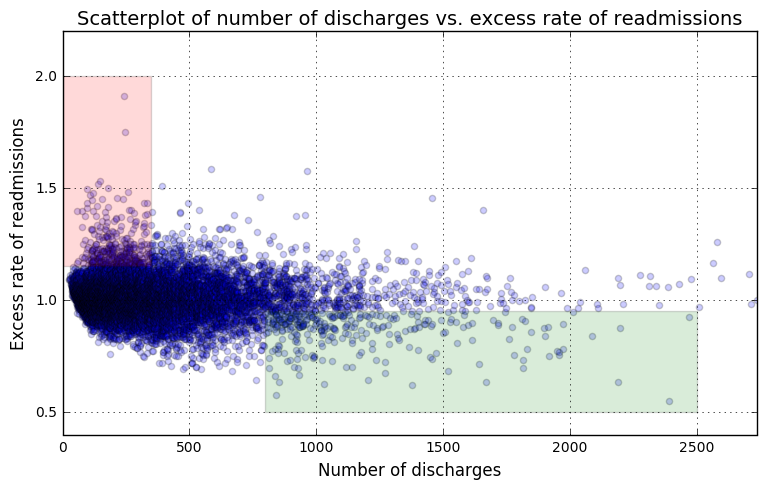

In [7]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

## Distribution Analysis

We first how the variables x and y are distributed. Do they follow a normal distribution?

In [8]:
# Your turn
import numpy as np
def eval_pdf(rv, num=4):
    mean, std = rv.mean(), rv.std()
    xs = np.linspace(mean - num*std, mean + num*std, 100)
    ys = rv.pdf(xs)
    return xs, ys

In [9]:
x_s = pd.Series(x)
m_x = x_s.mean()
s_x = x_s.std()
print 'mean(x) =', m_x, 'std(x) =', s_x

mean(x) = 364.313728902 std(x) = 299.546395477


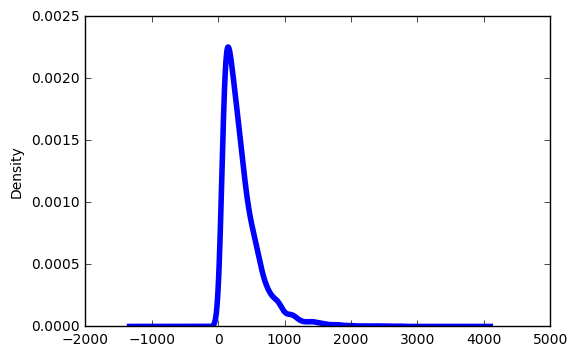

In [10]:
ax = x_s.plot(kind='kde', linewidth=4, color='b')

In [11]:
import scipy.stats
x_norm = scipy.stats.norm(m_x, s_x)

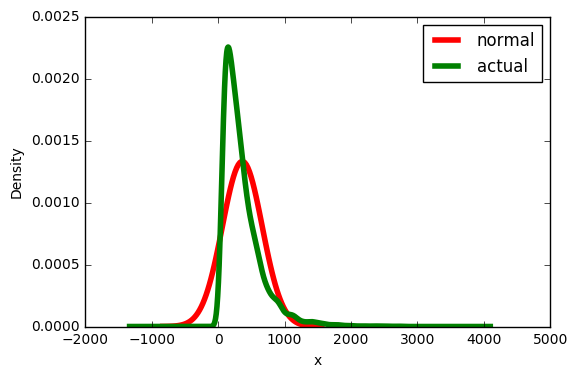

In [12]:
xs, ys = eval_pdf(x_norm)
plt.plot(xs, ys, label='normal', linewidth=4, color='r')
ax_line = ax.get_lines()
ya = ax_line[0].get_ydata()
xa = ax_line[0].get_xdata()
plt.plot(xa, ya, label='actual', linewidth=4, color='g')
plt.ylabel('Density')
plt.xlabel('x')
plt.legend()

In the above graph, we observe that the variable x has a distribution skewed to the left of the normal distribution of the same mean and standard deviation. 

In [13]:
y_s = pd.Series(y)
m_y = y_s.mean()
s_y = y_s.std()
print 'mean(y) =', m_y, 'std(y) =', s_y

mean(y) = 1.007540917 std(y) = 0.0919115822476


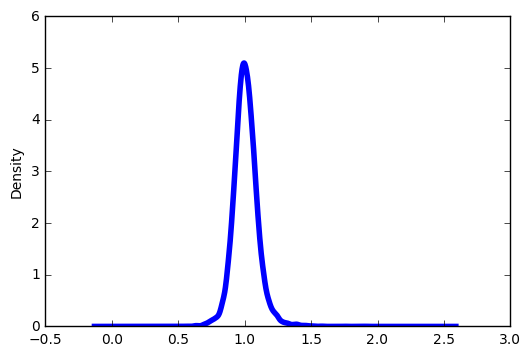

In [14]:
ay = y_s.plot(kind='kde', linewidth=4, color='b')

In [15]:
y_norm = scipy.stats.norm(m_y, s_y)

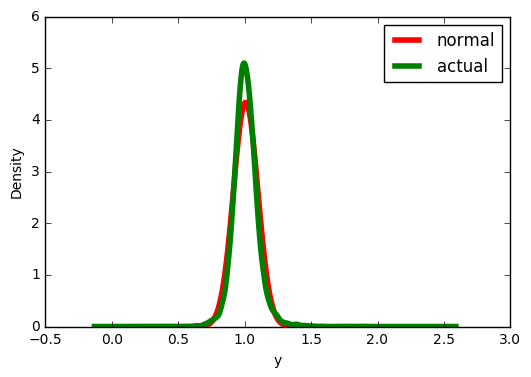

In [16]:
xs, ys = eval_pdf(y_norm)
plt.plot(xs, ys, label='normal', linewidth=4, color='r')
ay_line = ay.get_lines()
ya = ay_line[0].get_ydata()
xa = ay_line[0].get_xdata()
plt.plot(xa, ya, label='actual', linewidth=4, color='g')
plt.ylabel('Density')
plt.xlabel('y')
plt.legend()

We observe that the variable y is much more normally distributed.

## Null Hypothesis

We assume that there is no correlation between the 'Number of Discharges (x)' and the 'Excess Rate of Readmissions (y)' in the population i.e. the Pearson correlation coefficient between the two variables rho is 0,

    H0: rho = 0
    
Although x has a skewed distribution, we can start with an approximate analysis by assuming that both x and y are normally distributed in the population and the sampling distribution of their correlation coefficient follows a Student's-t distribution with N - 2 degress of freedom.     
    
   

In [17]:
N = len(x)
N

11494

In [18]:
r = scipy.stats.pearsonr(x,y)[0]
r

-0.093095542875904408

## T-statistic
We compute the value of the t-statistic,

In [19]:
t = r / ( (1-r**2) / (N-2) )**(0.5)
t

-10.023441674263589

## P-value

The corresponding p-value that I computed from an online calculator is < 0.00001, which means that the result is statistically very significant. This statistical significance means that the value of the correlation between the two variables in the sample is representative of the actual population. However, since the value of the correlation coefficient i.e. -0.093 is very small. This means that there is virtually no correlation between the two variables in the sample or the population. Therefore, their is no practical significance of the relationship between the two variables.

In [20]:
clean_hospital_read_df.corr()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,-0.009596,NaN,-0.012112,-0.009049,-0.003710,-0.009099
Number of Discharges,-0.009596,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.012112,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.009049,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.003710,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.009099,0.791272,NaN,0.117600,0.361033,0.330527,1.000000


## Readmissions vs Discharges

Let's plot a scatter plot of readmissions and discharges. This might give us some insight.

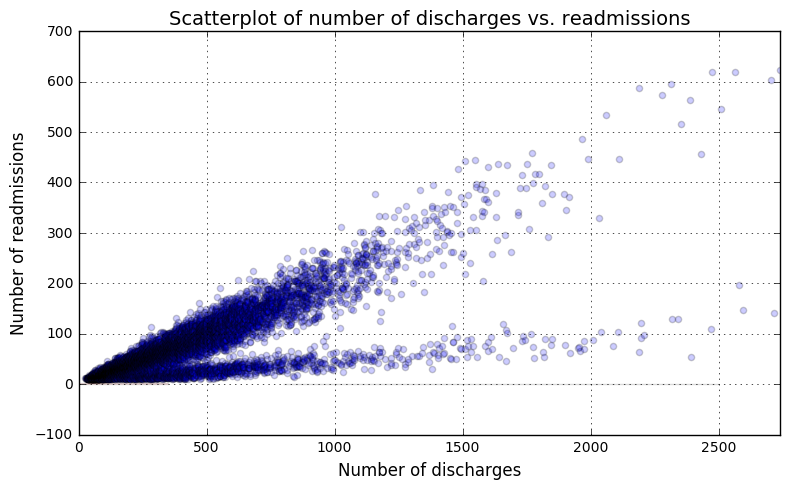

In [21]:
# generate a scatterplot for number of discharges vs. number of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Number of Readmissions'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Number of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

We observe two different relationships between the number of discharges and readmissions probably indicating two different readmission rates among two categories of hospitals. We find it useful to study the other characteristics of these categories that may help us differentiate these relationships.

Apparently, no variables exist in the dataset that may be able to explain this dichotomy. We need to look for other data about the hospitals to find the reasons behind excess readmission rates. 